<a href="https://colab.research.google.com/github/coding-cosmos/Radial-Gate-Cavitation-Index/blob/main/Radial_Gate_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Featuers

## Utils

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

# Define the statistics function
def calculate_stats(df):
    stats = {
        "Mean": df.mean(),
        "Standard deviation": df.std(),
        "Variance": df.var(),
        "Kurtosis": df.apply(lambda x: kurtosis(x, fisher=True)),
        "Skewness": df.apply(lambda x: skew(x)),
        "Range": df.max() - df.min(),
        "Minimum": df.min(),
        "Maximum": df.max(),
        "Sum": df.sum(),
        "Count": df.count()
    }
    return pd.DataFrame(stats)

def save_stats(train_df,test_df,filename):
    # Compute stats
    train_stats = calculate_stats(train_df)
    test_stats = calculate_stats(test_df)

    # Add a multi-index for presentation like in the table
    train_stats.index.name = 'Property'
    train_stats.columns.name = 'Training data set'
    test_stats.columns.name = 'Testing data set'

    # Combine them into a multi-part table
    final_table = pd.concat([train_stats, test_stats], axis=1)

    # Export to LaTeX or CSV
    final_table.to_csv(filename)
    return final_table


## Dimensional

In [ ]:

# Assuming your training and testing datasets are loaded
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim_training.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim_testing.csv")

dim_stats_feat = save_stats(train_df,test_df,"dim_stats_features.csv")

            Mean  Standard deviation    Variance  Kurtosis  Skewness      Range    Minimum    Maximum           Sum  Count       Mean  Standard deviation    Variance  Kurtosis  Skewness      Range    Minimum    Maximum          Sum  Count
AR      1.095285            0.443624    0.196802 -1.533061  0.266705   1.066667   0.600000   1.666667    441.400000    403   1.063366            0.428577    0.183678 -1.340823  0.407956   1.066667   0.600000   1.666667   107.400000    101
L       3.220844            1.919619    3.684938 -1.410967  0.305351   5.000000   1.000000   6.000000   1298.000000    403   3.366337            1.937642    3.754455 -1.469503  0.170495   5.000000   1.000000   6.000000   340.000000    101
phi    28.858561           16.808472  282.524721 -0.719464  0.698615  50.000000  10.000000  60.000000  11630.000000    403  30.396040           17.545415  307.841584 -0.969390  0.620382  50.000000  10.000000  60.000000  3070.000000    101
QW     11.931638            7.542068   56.88

## Non Dimensional

In [ ]:

# Assuming your training and testing datasets are loaded
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ndim_training.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ndim_testing.csv")

save_stats(train_df,test_df,'ndim_stats_features.csv')

            Mean  Standard deviation    Variance  Kurtosis  Skewness      Range    Minimum    Maximum           Sum  Count       Mean  Standard deviation    Variance  Kurtosis  Skewness      Range    Minimum    Maximum          Sum  Count
AR      1.095285            0.443624    0.196802 -1.533061  0.266705   1.066667   0.600000   1.666667    441.400000    403   1.063366            0.428577    0.183678 -1.340823  0.407956   1.066667   0.600000   1.666667   107.400000    101
phi    28.858561           16.808472  282.524721 -0.719464  0.698615  50.000000  10.000000  60.000000  11630.000000    403  30.396040           17.545415  307.841584 -0.969390  0.620382  50.000000  10.000000  60.000000  3070.000000    101
R/L     0.003731            0.003073    0.000009  1.387272  1.380063   0.013365   0.000425   0.013790      1.503472    403   0.003666            0.003152    0.000010  1.344369  1.498576   0.013365   0.000425   0.013790     0.370281    101
Fr     25.456510           19.298324  372.42

# Coorelation Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_corr(df):
    corr_matrix = df.corr().round(5)
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        center=0,
        linewidths=0.5,
        cbar_kws={"shrink": .8},
        fmt='.4f',
        annot_kws={'size': 10}
    )

    # Move x-axis labels to the top
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()
    plt.show()

## Dimensonal

In [ ]:
dim_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim.csv")


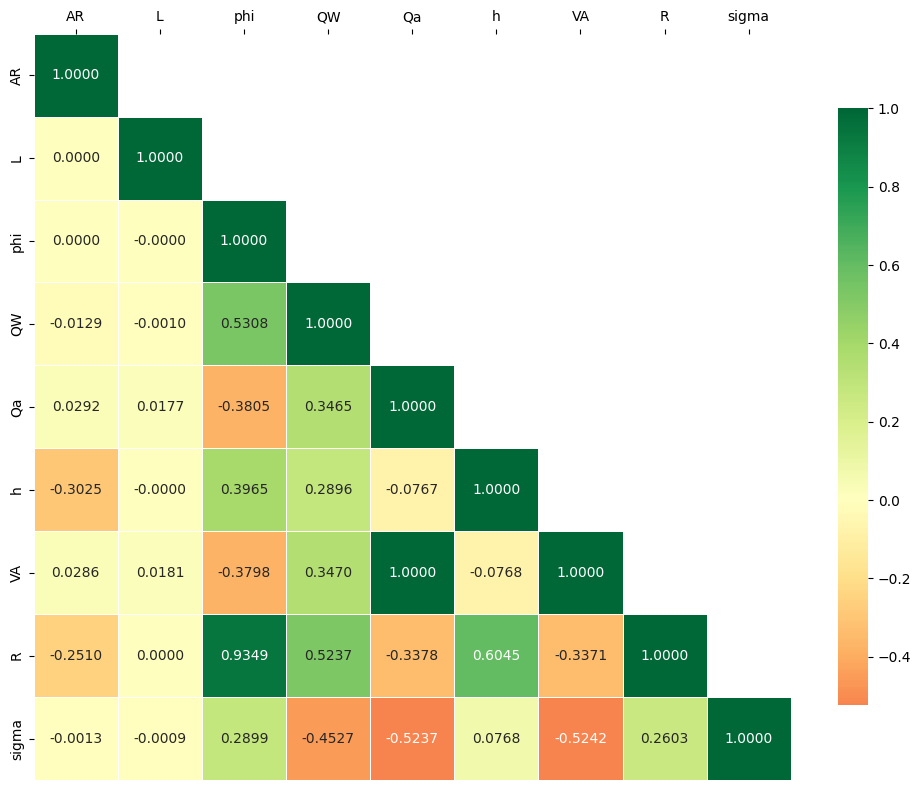

In [ ]:
plot_corr(dim_df)

## Non Dimensional

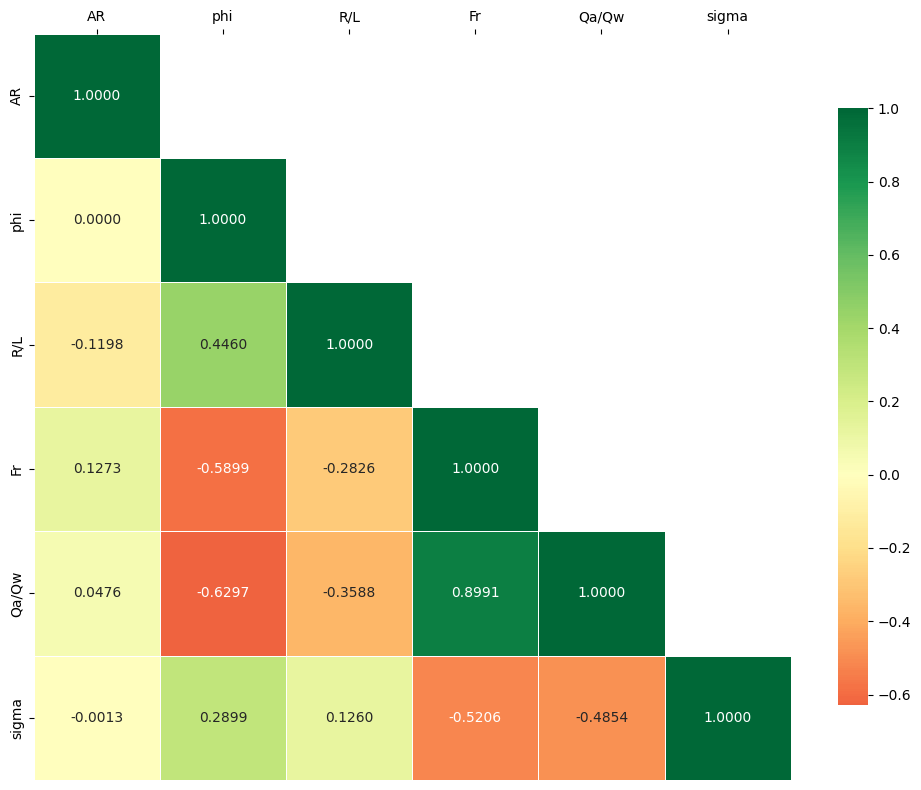

In [ ]:
ndim_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/non_dim.csv")
plot_corr(ndim_df)

#Violin Plots


## Dimensional

<ipython-input-58-3d099d4c561a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melted, x='Model', y='Relative Error', inner='box', palette='Set2')


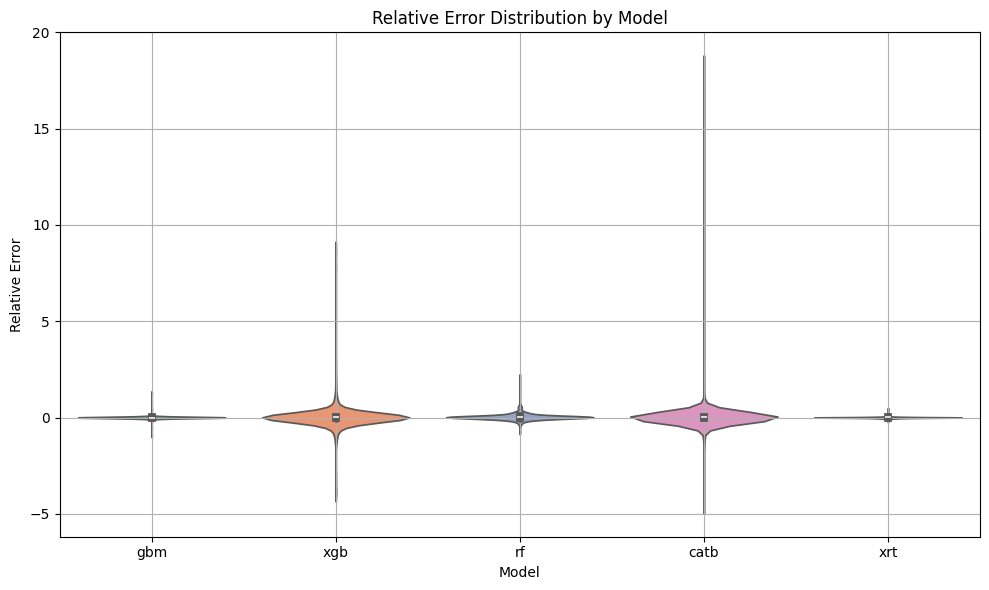

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---- Step 1: Load your data ----
# Example: Your DataFrame has one 'Observed' column and 7 model prediction columns
# Let's assume your columns look like this:
# ['Observed', 'GBM', 'RF', 'XGBoost', 'CatBoost', 'XRT', 'SVR', 'MLP']

# Replace this with your actual data
# df = pd.read_csv('your_data.csv')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim_training.csv")

# ---- Step 2: Compute Relative Errors ----
# Melt the DataFrame to long format for seaborn
model_cols = ['gbm', 'xgb', 'rf', 'catb', 'xrt']
df_melted = df.melt(id_vars='sigma', value_vars=model_cols,
                    var_name='Model', value_name='Predicted')

# Compute relative error
df_melted['Relative Error'] = np.abs(df_melted['sigma'] - df_melted['Predicted']) / df_melted['sigma']

# ---- Step 3: Plot Violin Plot ----
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_melted, x='Model', y='Relative Error', inner='box', palette='Set2')

plt.title('Relative Error Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Relative Error')
plt.grid(True)
plt.tight_layout()
plt.show()
